# Optimisation
## Travaux Pratiques - Optimisation sans contrainte

On souhaite optimiser les fonctions suivantes : 

\begin{align*}
    f(x_1,x_2)=(x_1^3-x_2)^2+2(x_2-x_1)^4
    \\
    g(x_1,x_2)=3x_1^2+8x_1x_2+9x_2^2+3x_1-4x_2
\end{align*}

Leur gradient sont respectivement : 

\begin{align*}
    \nabla f(x_1,x_2)= \begin{pmatrix}
    6x_1^5 - 6x_1^2x_2 - 8(x_2 - x_1)^3
    \\-2x_1^3 + 2x_2 + 8(x_2 - x_1)^3
\end{pmatrix}
\end{align*}

\begin{align*}
    \nabla g(x_1,x_2)=
    \begin{pmatrix}
 6x_1+8x_2+3 \\
8x_1+18x_2-4
\end{pmatrix}
\end{align*}

Leur matrice hessienne sont :

\begin{align*}    
\nabla^2 f(x_1,x_2)= \begin{pmatrix} 
30x_1^4-12x_1x_2+24(x_2-x_1)^2&-6x_1^2-24(x_2-x_1)^2 
\\ 
-6x_1^2-24(x_2-x_1)^2&2+24(x_2-x_1)^2
\end{pmatrix}
\end{align*}

\begin{align*}    
    \nabla^2 g(x_1,x_2)=\begin{pmatrix}6&8\\8&18\end{pmatrix}
\end{align*}

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [91]:
def f(x):
    x1, x2 = x[0], x[1]
    return (x1**3 - x2)**2 + 2*(x2 - x1)**4

def g(x):
    x1, x2 = x[0], x[1]
    return 3*x1**2 + 8*x1*x2 + 9*x2**2 + 3*x1 - 4*x2

def gradf(x):
    x1, x2 = x[0], x[1]
    y1 = 6*x1**5 - 6*x1**2*x2 - 8*(x2 - x1)**3
    y2 = -2*x1**3 + 2*x2 + 8*(x2 - x1)**3
    return np.array([y1, y2])

def gradg(x):
    x1, x2 = x[0], x[1]
    y1 = 6*x1 + 8*x2 + 3
    y2 = 8*x1 - 18*x2 - 4
    return np.array([y1, y2])

def hessf(x):
    x1, x2 = x[0], x[1]
    y11 = 30*x1**4 - 12*x1*x2 + 24*(x2 - x1)**2
    y12 = -6*x1**2 - 24*(x2 - x1)**2
    y21 = -6*x1**2 - 24*(x2 - x1)**2
    y22 = 2 + 24*(x2 - x1)**2
    return np.array([[y11, y12], [y21, y22]])

def hessg(x1, x2):
    y11, y12 = 6, 8
    y21, y21 = 8, 18
    return np.array([[y11, y12], [y21, y22]])

#### On affiche les fonctions : 
Tout d'abord, on établit la définition des variables : 

In [3]:
x = np.arange(-3.0,3.0,0.1)
y = np.arange(-3.0,3.0,0.1)
X,Y = np.meshgrid(x, y) # grille de points

On evalue f :

In [4]:
Zf = f([X, Y]) # 

On affiche f : 

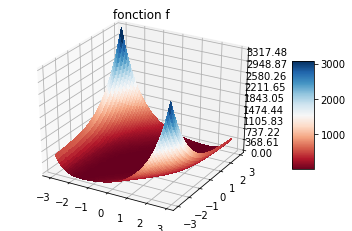

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d', title='fonction f')

surf = ax.plot_surface(X, Y, Zf, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

On evalue g : 

In [6]:
Zg = g([X, Y]) # Evaluation de g 

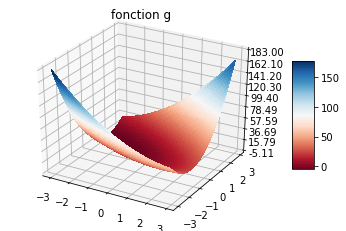

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d', title='fonction g')

surf = ax.plot_surface(X, Y, Zg, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 1- Implémentation de la méthode de gradient
***

#### Algorithme de gradient générique : 

Construction d'une suite telle que 


\begin{align*}
    x_{k+1} = x_k - \alpha_k D_k \nabla f(x_k)
\end{align*}

où $\alpha_k$est tel que : 

\begin{align*}
    f(x_k-\alpha_kD_k\nabla f(x_k)) = min_{\alpha\ge0} (f(x_k-\alpha D_k \nabla f(x_k))
\end{align*}


et $D_k$ est une matrice définie positive 

***
***

#### Algorithme de la plus grande pente : 

$D_k = I$

Soif $f \in C^1$, $x_0$, et $\alpha_k > 0$ k=0,1,2,...

Arrêt = faux; k=0

Tant que Arrêt = Faux, Faire 

Debut
<br>
&emsp;$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$<br>
&emsp;Si (Cond d'arrêt) alors Arrêt=vrai<br>
&emsp;Sinon k=k+1<br>
Fin

***

In [140]:
#Définition du pas alpha : 
alpha = 0.1

#Pc = Pas constant

def Gradient(f, gradf, x, PC=True, alpha=0.1, epsilon=10**(-7), stepmax=10000):
    Arret=False
    k=0
    X_array=np.array([x])
    
    while(Arret==False) and (k < stepmax):
        """On vérifie si le pas est constant ou non, si le pas n'est pas constant, 
        on le calcule grâce à optimize.line_search"""
        if not(PC):
            result_alpha = optimize.line_search(f, gradf, x, -gradf(x))
            alpha=result_alpha[0]
        #On calcul x_k+1 à partir de x_k grâce à la formule :
        print(x)
        x = x - alpha*gradf(x)
        X_array = np.concatenate([X_array, [x]])
        
        #Si le gradient de la fonction est très proche de zéro (inférieur à espilon) pour la valeur de x, on arrête l'algorithme
        #Sinon, on incrémente k
        if np.linalg.norm(gradf(x)) < epsilon:
            Arret=True    
        else:
            k+=1
    
    print('{} iterations'.format(k))
    return X_array, x

In [145]:
x0 = np.array([0., 2.])
X_GPC, x_gpc = Gradient(f=g, gradf=gradg, x=x0, PC=True, alpha=0.005, epsilon=10**(-7), stepmax=1000)
#X_GPV,x_gpv = Gradient(f=f, gradf=gradf, x=x0, PC=False, alpha=0.1, epsilon=10**(-7), stepmax=10000)

[0. 2.]
[-0.095  2.2  ]
[-0.19515  2.4218 ]
[-0.3011675  2.667568 ]
[-0.4138352   2.93969582]
[-0.53400797  3.24082185]
[-0.66262061  3.57385614]
[-0.80069623  3.94200801]
[-0.94935567  4.34881658]
[-1.10982766  4.7981843 ]
[-1.2834602  5.294414 ]
[-1.47173296  5.84224967]
[-1.67627096  6.44692145]
[-1.89885968  7.11419522]
[-2.1414617   7.85042718]
[-2.40623494  8.66262409]
[-2.69555285  9.55850966]
[-3.01202666 10.54659764]
[-3.35852976 11.6362725 ]
[-3.73822477 12.83787821]
[-4.15459315 14.16281624]
[-4.61146801 15.62365343]
[-5.11307011 17.23424096]
[-5.66404764 19.00984545]
[-6.26952003 20.96729345]
[-6.93512617 23.12513066]
[-7.66707761 25.50379746]
[-8.47221718 28.12582234]
[-9.35808356 31.01603504]
[-10.33298245  34.20180153]
[-11.40606504  37.71328297]
[-12.58741441  41.58372104]
[-13.88814082  45.84975251]
[-15.32048669  50.55175587]
[-16.89794233  55.73423336]
[-18.63537339  61.44623206]
[-20.54916147  67.74180788]
[-22.65735894  74.68053705]
[-24.97985966  82.32807974]
[-27

[-1.32783503e+12  4.38554118e+12]
[-1.46342162e+12  4.83335329e+12]
[-1.61285311e+12  5.32689195e+12]
[-1.77754319e+12  5.87082635e+12]
[-1.95904995e+12  6.47030245e+12]
[-2.15909055e+12  7.13099167e+12]
[-2.37955750e+12  7.85914454e+12]
[-2.62253656e+12  8.66164985e+12]
[-2.89032645e+12  9.54609980e+12]
[-3.18546065e+12  1.05208618e+13]
[-3.51073131e+12  1.15951578e+13]
[-3.86921568e+12  1.27791513e+13]
[-4.26430526e+12  1.40840435e+13]
[-4.69973785e+12  1.55221797e+13]
[-5.17963290e+12  1.71071653e+13]
[-5.70853052e+12  1.88539955e+13]
[-6.29143443e+12  2.07791964e+13]
[-6.93385925e+12  2.29009814e+13]
[-7.64188273e+12  2.52394241e+13]
[-8.42220321e+12  2.78166476e+13]
[-9.28220302e+12  3.06570340e+13]
[-1.02300183e+13  3.37874552e+13]
[-1.12746159e+13  3.72375269e+13]
[-1.24258785e+13  4.10398889e+13]
[-1.36946977e+13  4.52305141e+13]
[-1.50930774e+13  4.98490482e+13]
[-1.66342470e+13  5.49391857e+13]
[-1.83327870e+13  6.05490823e+13]
[-2.02047667e+13  6.67318112e+13]
[-2.22678961e+

[-2.49638632e+23  8.24500393e+23]
[-2.75129489e+23  9.08690973e+23]
[-3.03223243e+23  1.00147834e+24]
[-3.34185679e+23  1.10374032e+24]
[-3.68309722e+23  1.21644438e+24]
[-4.05918205e+23  1.34065676e+24]
[-4.4736693e+23  1.4775526e+24]
[-4.93048026e+23  1.62842701e+24]
[-5.43393665e+23  1.79470736e+24]
[-5.98880149e+23  1.97796677e+24]
[-6.60032416e+23  2.17993898e+24]
[-7.27429002e+23  2.40253479e+24]
[-8.01707524e+23  2.64786008e+24]
[-8.83570701e+23  2.91823579e+24]
[-9.73793012e+23  3.21621984e+24]
[-1.07322801e+24  3.54463134e+24]
[-1.18281643e+24  3.90657728e+24]
[-1.30359503e+24  4.30548189e+24]
[-1.43670645e+24  4.74511907e+24]
[-1.58341002e+24  5.22964804e+24]
[-1.74509364e+24  5.76365276e+24]
[-1.92328694e+24  6.35218526e+24]
[-2.11967574e+24  7.00081341e+24]
[-2.33611801e+24  7.71567365e+24]
[-2.57466141e+24  8.50352900e+24]
[-2.83756273e+24  9.37183306e+24]
[-3.12730917e+24  1.03288005e+25]
[-3.44664192e+24  1.13834850e+25]
[-3.79858206e+24  1.25458643e+25]
[-4.18645917e+24

[-1.83077227e+35  6.04663007e+35]
[-2.01771431e+35  6.66405766e+35]
[-2.22374519e+35  7.34453142e+35]
[-2.45081409e+35  8.09448906e+35]
[-2.70106923e+35  8.92102564e+35]
[-2.97687818e+35  9.83196072e+35]
[-3.28085026e+35  1.08359123e+36]
[-3.61586124e+35  1.19423784e+36]
[-3.98508054e+35  1.31618269e+36]
[-4.39200120e+35  1.45057946e+36]
[-4.84047295e+35  1.59869961e+36]
[-5.33473861e+35  1.76194447e+36]
[-5.87947424e+35  1.94185843e+36]
[-6.47983338e+35  2.14014358e+36]
[-7.14149581e+35  2.35867584e+36]
[-7.87072128e+35  2.59952265e+36]
[-8.67440870e+35  2.86496257e+36]
[-9.56016146e+35  3.15750684e+36]
[-1.05363594e+36  3.47992310e+36]
[-1.16122378e+36  3.83526162e+36]
[-1.27979753e+36  4.22688411e+36]
[-1.41047897e+36  4.65849558e+36]
[-1.55450443e+36  5.13417934e+36]
[-1.71323647e+36  5.65843566e+36]
[-1.88817680e+36  6.23622433e+36]
[-2.08098047e+36  6.87301159e+36]
[-2.29347152e+36  7.57482185e+36]
[-2.52766025e+36  8.34829468e+36]
[-2.78576223e+36  9.20074761e+36]
[-3.07021926e+

#### On compare les méthodes codées ci-dessus avec les méthodes de : 
- Méthode de Newton *`optimize.fmin_ncg`*
- Gradient conjugué *`optimize.fmin_cg`*
- Quasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP) mentionnée en cours : *`optimize.fmin_bfgs`*
- Force Brute *`optimize.brute`*

Pour cela, on code la fonction *`compare_fncts`*

In [122]:
def compare_fncts(x0, f, fprime, fhess, nb_iter=1, stepmax=10000):
    print_str = '    x optimal = [{0:.4f},{1:.4f}]\n    valeur de f : {2:.1e}\n    en {3:.1f}ms'
    
    
    print('Gradient à pas constants')
    t1 = time.time()
    for i in range(nb_iter):
        X_GPC, x_gpc = Gradient(f=f, gradf=fprime, x=x0, PC=True, alpha=0.1, epsilon=10**(-7), stepmax=stepmax)
    t2 = time.time()
    print(print_str.format(x_gpc[0], x_gpc[1], f(x_gpc), (t2 - t1)*1e3))
    
    
    print('\n\nGradient à pas variables')
    t1 = time.time()
    for i in range(nb_iter):
        XGPV,x_gpv = Gradient(f=f, gradf=fprime, x=x0, PC=False, alpha=0.1, epsilon=10**(-7), stepmax=stepmax)
    t2 = time.time()
    print(print_str.format(x_gpv[0], x_gpv[1], f(x_gpv), (t2 - t1)*1e3))
    
    
    print('\n\nAlgorithme de Newton\nMatrice Hessienne approximée')
    t1 = time.time()
    for i in range(nb_iter):
        x_new = optimize.fmin_ncg(f=f,x0=x0,fprime=gradf, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_new[0], x_new[1], f(x_new), (t2 - t1)*1e3))    
    print('Matrice Hessienne donnée')
    t1 = time.time()
    for i in range(nb_iter):
        x_new = optimize.fmin_ncg(f=f,x0=x0,fprime=gradf, fhess=fhess, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_new[0], x_new[1], f(x_new), (t2 - t1)*1e3))    

    
    print('\n\nGradient conjugué\nGradient approximé')
    t1 = time.time()
    for i in range(nb_iter):
        x_gc = optimize.fmin_cg(f=f,x0=x0, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_gc[0], x_gc[1], f(x_gc), (t2 - t1)*1e3))
    print('Gradient donné')
    t1 = time.time()
    for i in range(nb_iter):
        x_gc = optimize.fmin_cg(f=f,x0=x0,fprime=gradf, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_gc[0], x_gc[1], f(x_gc), (t2 - t1)*1e3))
    
    
    print('\n\nQuasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP)')
    t1 = time.time()
    for i in range(nb_iter):
        x_quasi_new = optimize.fmin_bfgs(f=f,x0=x0,fprime=gradf, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_quasi_new[0], x_quasi_new[1], f(x_quasi_new), (t2 - t1)*1e3))
    
    
    print('\n\nForce Brute')
    lower_bound = np.zeros(2, dtype=float)
    upper_bound = -np.zeros(2, dtype=float)
    t1 = time.time()
    for i in range(nb_iter):
        x_brute = optimize.brute(func=f,ranges=(lower_bound, upper_bound))
    t2 = time.time()
    print(print_str.format(x_brute[0], x_brute[1], f(x_brute), (t2-t1)*1e3))

**Initialisation des paramètres : **

In [108]:
x0=np.array([0.2,0.2])

**Execution de la fonction :**

In [123]:
compare_fncts(x0, f, gradf, hessf, stepmax=1000)

Gradient à pas constants
1000 iterations
    x optimal = [0.0256,0.0001]
    valeur de f : 8.5e-07
    en 144.3ms


Gradient à pas variables
1000 iterations
    x optimal = [0.0079,-0.0000]
    valeur de f : 8.0e-09
    en 337.7ms


Algorithme de Newton
Matrice Hessienne approximée
    x optimal = [0.0034,0.0000]
    valeur de f : 2.6e-10
    en 8.0ms
Matrice Hessienne donnée
    x optimal = [0.0034,0.0000]
    valeur de f : 2.6e-10
    en 6.9ms


Gradient conjugué
Gradient approximé
    x optimal = [0.0003,0.0000]
    valeur de f : 1.5e-14
    en 4.1ms
Gradient donné
    x optimal = [0.0003,0.0000]
    valeur de f : 1.5e-14
    en 3.4ms


Quasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP)
    x optimal = [0.0100,0.0000]
    valeur de f : 2.0e-08
    en 4.1ms


Force Brute
    x optimal = [0.0000,0.0000]
    valeur de f : 0.0e+00
    en 9.5ms


#### Illustration de la convergence pour les méthodes de gradient à pas constant ou non: 

In [120]:
X_GPC, x_gpc = Gradient(f=f, gradf=gradf, x=x0, PC=True, alpha=0.1, epsilon=10**(-7), stepmax=100000)
X_GPV,x_gpv = Gradient(f=f, gradf=gradf, x=x0, PC=False, alpha=0.1, epsilon=10**(-7), stepmax=100000)

100000 iterations
19536 iterations


/home/tfm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


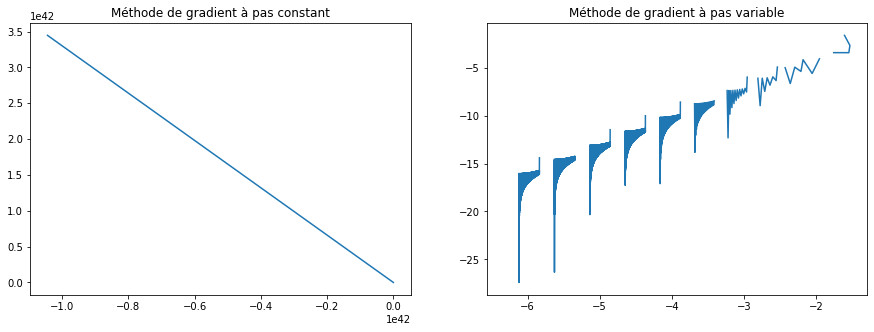

In [146]:
#Façon d'approcher le point : 

fig = plt.figure(1, figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Méthode de gradient à pas constant')
plt.plot(X_GPC[:,0],X_GPC[:,1])

plt.subplot(1,2,2)
plt.title('Méthode de gradient à pas variable')
plt.plot(np.log(X_GPV[:,0]),np.log(X_GPV[:,1]))

plt.tight_layout
plt.show()

In [119]:
#Vitesse de convergence : 

fig = plt.figure(1, figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Méthode de gradient à pas constant')
plt.plot(np.,f(X_GPC[:,0],X_GPC[:,1]))

plt.subplot(1,2,2)
plt.title('Méthode de gradient à pas variable')
plt.plot(,f(X_GPV[:,0],X_GPV[:,1])

plt.tight_layout
plt.show()

SyntaxError: invalid syntax (<ipython-input-119-7ca26a2c372d>, line 6)

#### Critère d'arrêt : En tester plusieurs ! 

#### Pour la fonction quadratique et convexe :
<br>Gradient : linérairemnt
<br>Newton : peu d'iter
<br>Gradient conjugué : n iter
<br> et tester le alpha avec les valeurs propres vues en classe 

Dans chaque cas, on essaiera d’améliorer les performances de la méthode en modifiant les paramètres par défaut, en ayant recours au calcul exacte du gradient, de la matrice Hessienne,….

On comparera le nombre d’itérations, la précision et on illustrera la vitesse de convergence.

## Avec g(x) : 

In [124]:
compare_fncts(x0, g, gradg, hessg, stepmax=10000)

Gradient à pas constants


/home/tfm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/home/tfm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


10000 iterations
    x optimal = [nan,nan]
    valeur de f : nan
    en 1643.7ms


Gradient à pas variables


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'